In [ ]:
#Import the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Problem Statement

A key challenge for e-commerce businesses is to analyze the trend in the
market to increase their sales. The trend can be easily observed if the
companies can group the customers; based on their activity on the ecommerce site. This grouping can be done by applying 
different criteria like previous orders, mostly searched brands and so on. 

Given the e-commerce data, use k-means clustering algorithm to cluster
customers with similar interest.

# Variable Description

1.Cust_ID: Customer ID Number.

2.Gender: Gender Of The Customer.

3.Orders: Orders made by the Customers.
    
4.Jordan: Brand of basketball shoes, athletic, casual, and style clothing produced by Nike1.
    
5.Gatorade: Sports drink brand that is made to help athletes rehydrate and replenish electrolytes,
    carbohydrates,and other nutrients.

6.Samsung: South Korean multinational conglomerate that produces electronics, appliances, smartphones, TVs, and more.
    
7.Asus:Taiwanese multinational computer and phone hardware and electronics company that is known for its laptops, 
     desktops, monitors, routers,and more.
        
8.Udis:Brand of gluten-free products, such as bread, muffins, granola, cookies, and more.

9.Mondelez: International is an American multinational confectionery, food, holding and beverage company that owns brands
    such as Oreo, Cadbury, Toblerone, Trident, and more.
    
10.Wrangler: An American manufacturer of jeans and other clothing items, especially workwear.
    
11.Vans: An American manufacturer of skateboarding shoes and related apparel, such as hoodies, backpacks, hats, and more.
    
12.Fila: An Italian-South Korean sporting goods company that produces shoes and clothing for sports such as tennis, basketball,
    running, and more.
    
13.Brooks: An American company that designs and markets high-performance men’s and women’s running shoes, clothing, and 
    accessories.
    
14.H&M: Swedish multinational clothing-retail company that is known for its fast-fashion clothing for men, women,
    teenagers, and children.
    
15.Dairy Queen: An American chain of soft serve ice cream and fast-food restaurants.

16.Fendi: Italian luxury fashion house that produces fur, leather goods, shoes, fragrances, eyewear, and more.

17.Hewlett Packard: An American multinational information technology company that develops and provides a wide variety of
    hardware and software products and services.
    
18.Pladis: British confectionery and snack foods company that owns brands such as McVitie’s, Godiva, Ulker, and more.
    
19.Asics: Japanese multinational corporation that produces footwear and sports equipment for a wide range of sports, 
    such as running, tennis, wrestling, and more.
    
20.Siemens: German multinational conglomerate that operates in the fields of industry, energy, healthcare, and infrastructure.
    
21.J.M. Smucker: An American manufacturer of fruit spreads, ice cream toppings, beverages, shortening, peanut butter, and more.
    
22.Pop Chips:Brand of processed potato and corn products marketed as similar to potato chips.
    
23.Juniper:An American multinational corporation that develops and markets networking products, such as routers,
    switches, firewalls, and more.
    
24.Huawei: Chinese multinational technology company that provides telecommunications equipment and sells consumer electronics,
    such as smartphones, tablets, laptops, and more.
    
25.Compaq: An American information technology company that produced and sold personal computers, servers, and more.

26.IBM: An American multinational technology and consulting company that produces and sells hardware, software, and services 
    for various industries, such as cloud computing, artificial intelligence, and more.
    
27. Burberry: British luxury fashion house that produces clothing, fragrances, sunglasses, and more.

28.Mi: Chinese electronics company that produces and sells smartphones, laptops, smart TVs, and more.

29.LG: South Korean multinational electronics company that produces and sells products such as TVs, refrigerators,
    washing machines, smartphones, and more.
    
30.Dior: French luxury fashion house that produces and sells clothing, accessories, makeup, fragrances, and more.

31.Scabal: Belgian textile company that produces and sells fabrics, suits, and accessories for men.

32.Tommy Hilfiger: An American clothing brand that produces and sells apparel, footwear, accessories, fragrances, and more.

33.Hollister: An American clothing brand that produces and sells casual wear and accessories for teenagers and young adults.

34.Forever 21: An American fast fashion retailer that sells clothing, accessories, and beauty products for women, men, and
   children.
    
35.Colavita: An Italian food company that produces and sells olive oil, pasta, vinegar, and more.

36.Microsoft: An American multinational technology company that develops, manufactures, and sells software, hardware,
    and services for various fields, such as personal computing, gaming, cloud computing, and more.
    
37.Jiffy mix: Brand of baking mixes that are made by the Chelsea Milling Company.

38.Kraft: An American food company that produces and sells cheese, beverages, snacks, and more.


# Load the Dataset

In [2]:
df=pd.read_excel(r"C:\Users\SKAN\Downloads\cust_data (1).xlsx")

In [3]:
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29996,29997,M,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29997,29998,M,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29998,29999,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Data Preprocessing

In [5]:
#Check the shape and information of the dataset

In [4]:
df.shape

(30000, 38)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

# Check the null values and Duplicate Values

In [6]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

There are 2724 null values present in Gender column

In [7]:
df["Gender"].unique()

array(['M', 'F', nan], dtype=object)

In [8]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])

In [9]:
df.isnull().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

In [10]:
df.duplicated().sum()

0

There is no duplicate values in dataset

# Explore the summary of Dataset

In [11]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,0.094267,0.140133,0.328200,0.209333,0.141467,0.161100,0.106100,0.300233,0.048067,0.754800,0.247900,0.470833,0.258000,0.118767,0.031967,0.428033,0.121333,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,0.531592,0.471278,0.807655,1.116820,0.529210,0.604835,0.516512,1.119167,0.338763,1.262166,0.724106,1.346159,0.848288,0.597612,0.264475,1.098876,0.478977,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,15.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,66.000000,11.000000,64.000000,21.000000,79.000000,44.000000,30.000000,11.000000,37.000000,9.000000,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


# Correlation between the Numerical Features

In [12]:
df.corr()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,1.000000,0.029132,0.064277,0.021821,0.057206,0.049191,0.060677,0.035560,0.043043,0.002158,-0.000450,0.039574,0.023426,-0.005785,0.044053,0.048083,0.012790,0.000715,-0.039673,0.011654,0.046623,-0.015516,0.018493,-0.009158,-0.026589,0.061117,-0.031839,0.029693,0.062489,0.057356,0.016463,0.084793,0.049231,0.002061,-0.005614,-0.019145,0.022508
Orders,0.029132,1.000000,0.016090,0.034310,0.017885,0.015584,0.009018,0.008741,0.003856,0.006343,-0.009627,0.015389,0.030833,-0.002705,0.017077,0.006867,-0.000602,0.022064,0.007843,0.030807,0.018774,-0.002741,0.008031,0.002765,-0.007647,0.015813,0.010369,-0.006382,0.009027,0.020050,0.003550,0.001680,-0.003436,0.007455,0.015307,0.011268,-0.007160
Jordan,0.064277,0.016090,1.000000,0.177254,0.071258,0.123731,0.135673,0.021950,0.040710,0.115796,0.031611,0.165471,0.038302,0.043857,0.030369,0.008800,0.062050,0.009816,-0.011082,0.054025,0.081462,0.025708,0.051468,0.007495,0.001963,0.096492,0.022963,0.070205,0.061185,0.062582,0.063739,0.026350,0.024710,0.015564,0.015804,0.021651,0.018918
Gatorade,0.021821,0.034310,0.177254,1.000000,0.063890,0.046215,0.058180,0.031272,0.088166,0.170620,0.026350,0.154345,0.066794,0.055532,0.029120,0.016680,0.062749,0.042912,0.006296,0.060775,0.087545,0.030956,0.042281,0.008773,-0.009290,0.102216,0.033103,0.066443,0.056571,0.045958,0.058190,0.050302,0.031495,0.018279,0.016625,0.038655,0.018553
Samsung,0.057206,0.017885,0.071258,0.063890,1.000000,0.012274,0.028785,0.035807,0.014565,0.029155,0.024847,0.089334,0.031444,0.014086,0.015095,0.011988,0.025422,0.004546,-0.011741,0.026365,0.048772,0.001621,0.024820,0.004358,-0.005467,0.047852,0.004060,0.058584,0.017369,0.046561,0.015502,0.021566,0.016170,0.005584,0.003640,0.009303,0.006633
Asus,0.049191,0.015584,0.123731,0.046215,0.012274,1.000000,0.114588,0.018120,0.026668,0.046990,-0.004766,0.114384,0.025349,0.028589,0.006580,0.006500,0.030216,0.010339,-0.000218,0.023046,0.022716,0.017840,0.033468,0.005892,-0.007446,0.047276,0.016904,0.025722,0.028911,0.043168,0.039139,0.017283,0.014186,0.009605,0.019748,0.008001,0.007530
Udis,0.060677,0.009018,0.135673,0.058180,0.028785,0.114588,1.000000,0.040251,0.023128,0.020696,0.021717,0.089850,0.037187,0.013806,0.011772,0.014293,0.022155,-0.008444,-0.014267,0.013708,0.020427,0.014118,0.024393,0.002922,-0.003076,0.040914,0.013516,0.030406,0.029567,0.068091,0.023367,0.032484,0.035360,0.000437,0.012679,0.004808,0.006795
Mondelez International,0.035560,0.008741,0.021950,0.031272,0.035807,0.018120,0.040251,1.000000,0.021211,0.020795,0.026681,0.039200,0.043001,0.022947,0.001657,0.012106,0.053772,0.018303,-0.002722,0.059322,0.031040,0.019580,0.021313,0.002441,0.000471,0.065318,0.011150,0.036895,0.034783,0.100657,0.056306,0.036270,0.044912,0.014344,0.013070,0.025066,0.019727
Wrangler,0.043043,0.003856,0.040710,0.088166,0.014565,0.026668,0.023128,0.021211,1.000000,0.028595,-0.002237,0.021861,0.070330,0.030978,0.024073,0.034098,0.040609,-0.002145,-0.010719,0.020302,0.043520,0.015098,0.030264,-0.000865,-0.006730,0.074666,0.024924,0.079583,0.054262,0.099995,0.045565,0.075141,0.066978,0.006188,0.008203,0.015954,0.014749
Vans,0.002158,0.006343,0.115796,0.170620,0.029155,0.046990,0.020696,0.020795,0.028595,1.000000,0.002731,0.122174,0.024992,0.031384,0.012768,0.002760,0.032070,-0.000852,-0.008563,0.030542,0.085626,0.010213,0.028003,0.015774,-0.003649,0.058406,-0.009476,0.073194,0.014776,-0.011961,0.021992,0.007039,0.002500,0.000045,-0.002454,0.008639,0.013326


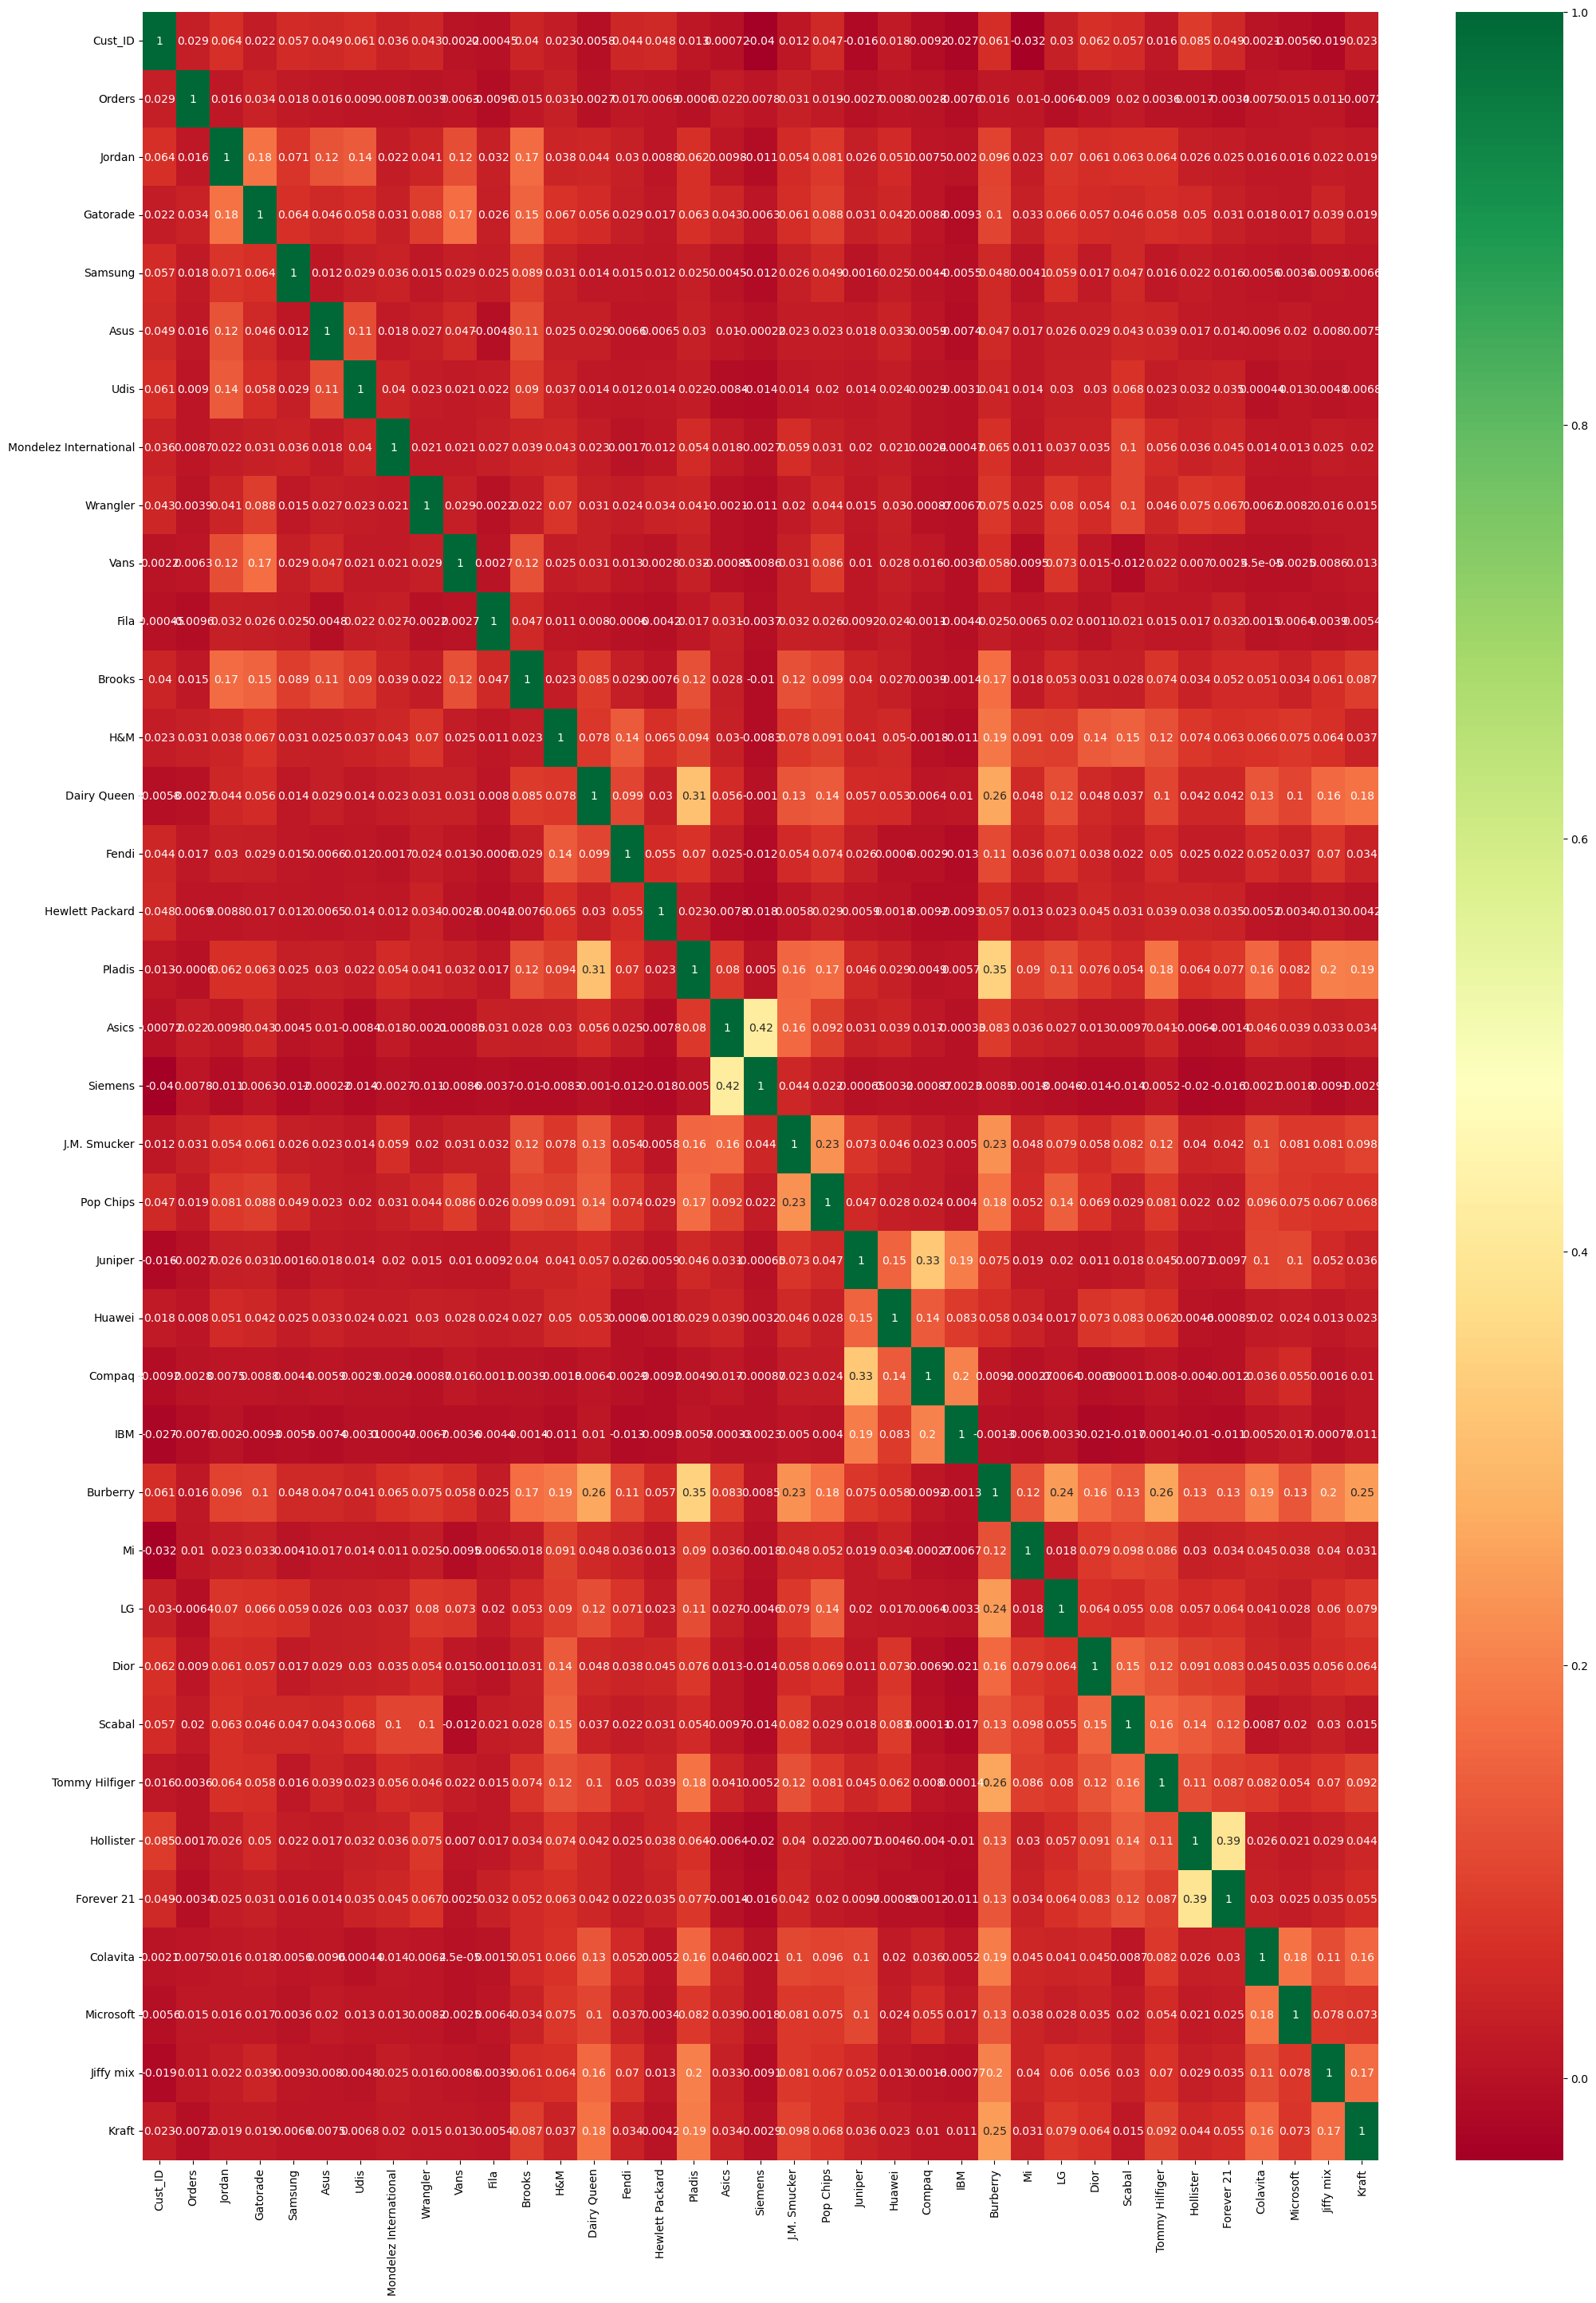

In [13]:
df_corr=df.corr()
ind_corr=df_corr.index
plt.figure(figsize=(25,35))
f=sns.heatmap(df[ind_corr].corr(),annot=True,cmap="RdYlGn")

# Check the Outliers

<Axes: >

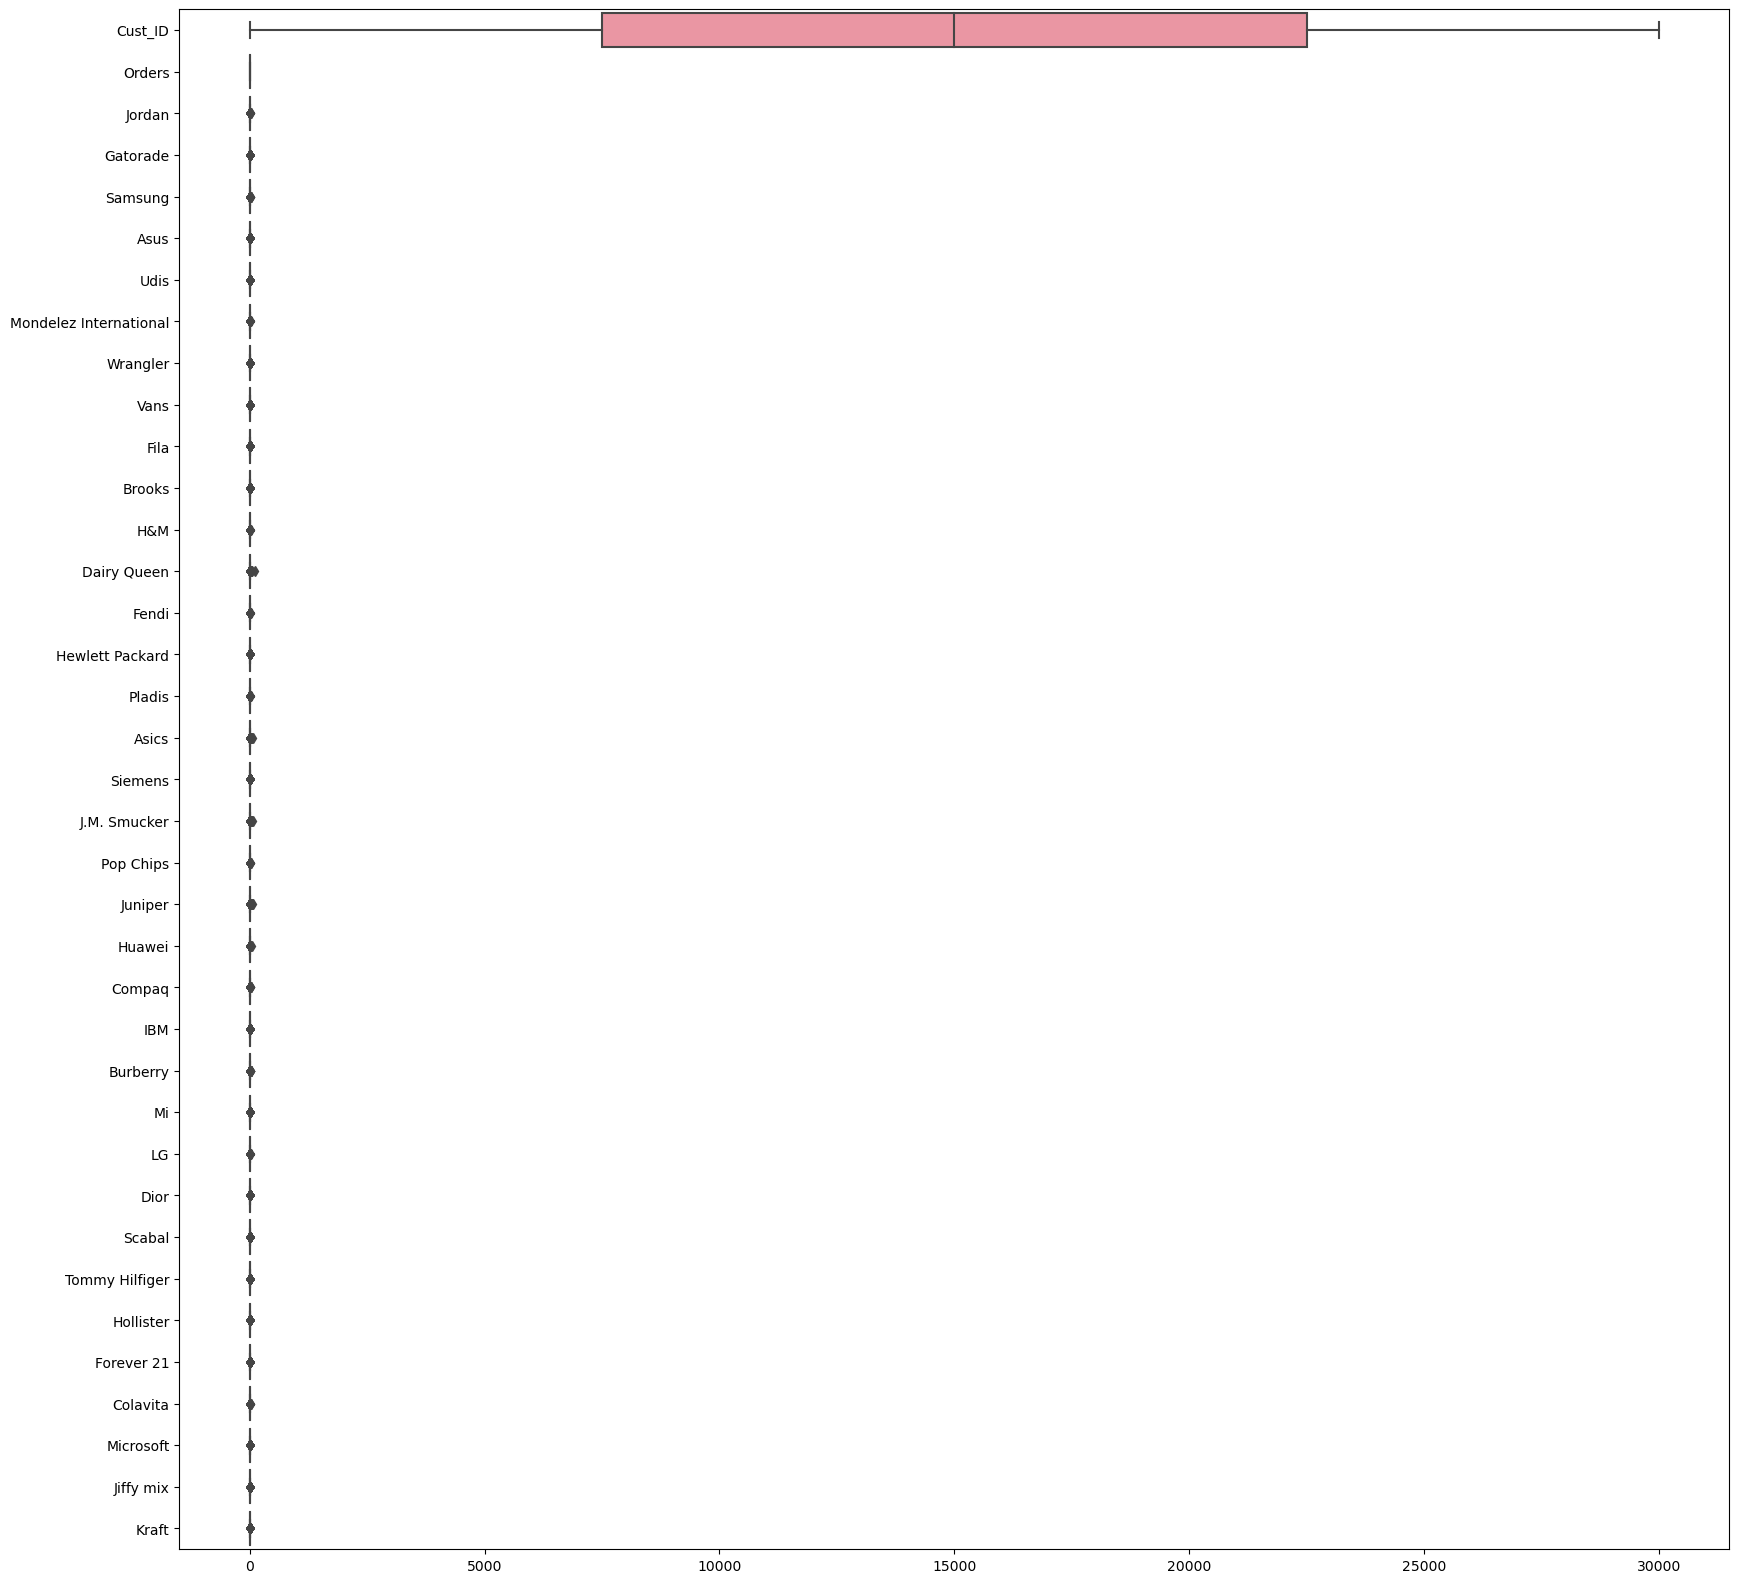

In [14]:
plt.figure(figsize=(20,20))
sns.boxplot(df,orient="h")

There is no outliers in dataset

In [15]:
df_c=df.copy()

In [16]:
df["Gender"]=pd.get_dummies(df["Gender"],drop_first=True)

In [17]:
df

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,1,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,3,1,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29996,29997,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29997,29998,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29998,29999,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
df.drop(["Cust_ID"],axis=1,inplace=True)

In [19]:
df

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,1,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29996,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29997,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[ 2.17828495,  0.78830146, -0.33231249, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [-0.45907676, -1.16142302, -0.33231249, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [ 2.17828495,  0.78830146, -0.33231249, ...,  1.97870833,
        -0.22048554, -0.18277495],
       ...,
       [ 2.17828495, -1.16142302, -0.33231249, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [ 2.17828495, -1.16142302, -0.33231249, ..., -0.26057832,
        -0.22048554, -0.18277495],
       [-0.45907676, -0.32582681,  2.15288625, ..., -0.26057832,
        -0.22048554, -0.18277495]])

# Applying K-Means clustering on scaled data and determine optimum Number of clusters by elbow curve.

In [21]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_scaled)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

In [22]:
for i in range(1,11):
    print('The WSS value for',i,'clusters is',wcss[i-2])

The WSS value for 1 clusters is 882264.4671571653
The WSS value for 2 clusters is 1110000.0000000035
The WSS value for 3 clusters is 1058328.7620752305
The WSS value for 4 clusters is 1026397.4866758317
The WSS value for 5 clusters is 1000729.8675799326
The WSS value for 6 clusters is 977433.0721730923
The WSS value for 7 clusters is 955801.8249172203
The WSS value for 8 clusters is 938130.614793433
The WSS value for 9 clusters is 915283.9810861729
The WSS value for 10 clusters is 898007.8181694678


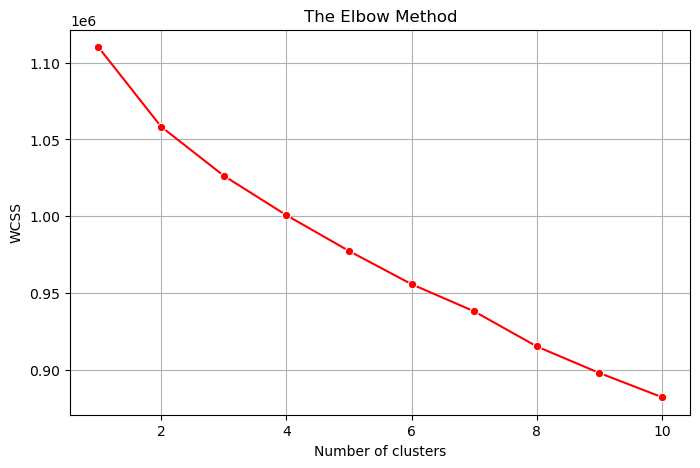

In [23]:
plt.figure(figsize=(8,5))
sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Check the optimum number of clusters through silhouette_score

In [25]:
from sklearn.metrics import silhouette_score
scores = []
for n in range(2, 11):
    k_means = KMeans(n_clusters=n, random_state=42)
    k_means.fit(df_scaled)
    labels = k_means.labels_
    score = silhouette_score(df_scaled, labels)
    scores.append(score)
    print(f"n_clusters = {n}, silhouette score = {score:.3f}")

n_clusters = 2, silhouette score = 0.397
n_clusters = 3, silhouette score = 0.084
n_clusters = 4, silhouette score = 0.083
n_clusters = 5, silhouette score = 0.086
n_clusters = 6, silhouette score = 0.083
n_clusters = 7, silhouette score = 0.089
n_clusters = 8, silhouette score = 0.088
n_clusters = 9, silhouette score = 0.095
n_clusters = 10, silhouette score = 0.092


Apply scaled data in kmeans algorithm,in Elbow method bend in 2.so according to this 2 clusters are identified as an optimum number of clustering.
Highest value is in n_clusters =2.so 2 clusters were identified as an optimum number of clustering in silhoutte_score.

# Applying PCA method and check the Kmeans Algorithm Result

In [32]:
from sklearn.decomposition import PCA
# Create and fit the PCA model
pca = PCA(n_components=5)
pca.fit(df_scaled)

# Get the reduced data
X_reduced = pca.transform(df_scaled)

In [33]:
X_reduced

array([[-1.41393455,  0.84379543, -1.24303331,  1.11278315, -0.71254294],
       [ 3.42287752, -0.44164328, -0.08240042, -0.86986763,  0.27687149],
       [-0.79668553,  1.52939177, -1.07514532, -0.1788762 ,  0.45709216],
       ...,
       [-1.40179999,  0.70733664, -1.17915431,  0.96471213, -0.75009144],
       [-1.44528682,  0.69304838, -0.85029957, -0.09544626, -0.68499838],
       [-0.66351279, -0.02808333, -0.5765439 ,  0.8043831 , -0.26107218]])

In [35]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X_reduced)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

In [36]:
for i in range(2,11):
    print('The WSS value for',i,'clusters is',wcss[i-2])

The WSS value for 2 clusters is 275958.1564252359
The WSS value for 3 clusters is 224599.0389496856
The WSS value for 4 clusters is 198039.63463283362
The WSS value for 5 clusters is 175032.224162601
The WSS value for 6 clusters is 156380.81772990047
The WSS value for 7 clusters is 137125.34602426822
The WSS value for 8 clusters is 126391.33682520913
The WSS value for 9 clusters is 117424.8712562352
The WSS value for 10 clusters is 109176.75507294225


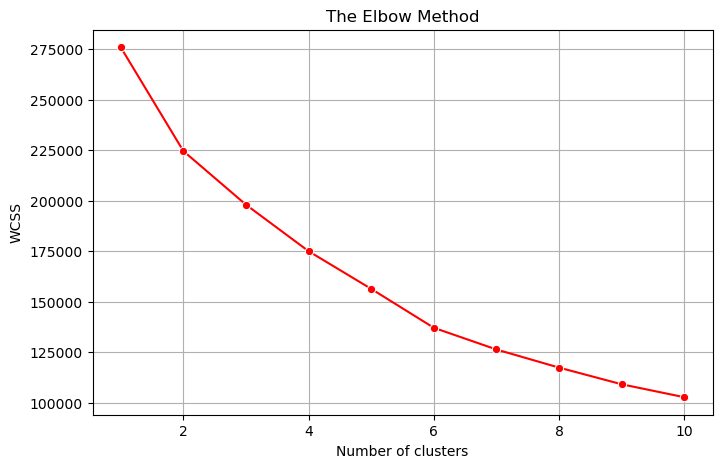

In [37]:
plt.figure(figsize=(8,5))
sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [38]:
from sklearn.metrics import silhouette_score
scores = []
for n in range(2, 11):
    k_means = KMeans(n_clusters=n, random_state=42)
    k_means.fit(X_reduced)
    labels = k_means.labels_
    score = silhouette_score(X_reduced, labels)
    scores.append(score)
    print(f"n_clusters = {n}, silhouette score = {score:.3f}")

n_clusters = 2, silhouette score = 0.531
n_clusters = 3, silhouette score = 0.373
n_clusters = 4, silhouette score = 0.387
n_clusters = 5, silhouette score = 0.364
n_clusters = 6, silhouette score = 0.372
n_clusters = 7, silhouette score = 0.389
n_clusters = 8, silhouette score = 0.396
n_clusters = 9, silhouette score = 0.254
n_clusters = 10, silhouette score = 0.240


After applying PCA method,in Elbow method line bend in 2.so according to this 2 clusters
are identified as an optimum number of clustering.
Highest value is in n_clusters =2.So 2 clusters were identified as an optimum number of clustering in silhoutte_score.
Using PCA and without Using PCA both gives 2 clusters were idenified as optimum number of clustering.

# Apply 2 in n_clusters for kmeans algorithm 

In [39]:
k_means2 = KMeans(n_clusters =2,random_state=42)
y=k_means2.fit_predict(df_scaled)
df["Cluster"]=k_means2.labels_


In [40]:
df

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,0
2,1,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
29996,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
29997,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
29998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Cluster Profiling

# Visualising Cluster

In [41]:
pca = PCA(n_components=2)
pca_df = pca.fit_transform(df_scaled)
k_means = KMeans(n_clusters=2, random_state=42)
k_means.fit(pca_df)
labels = k_means.labels_
centers = k_means.cluster_centers_

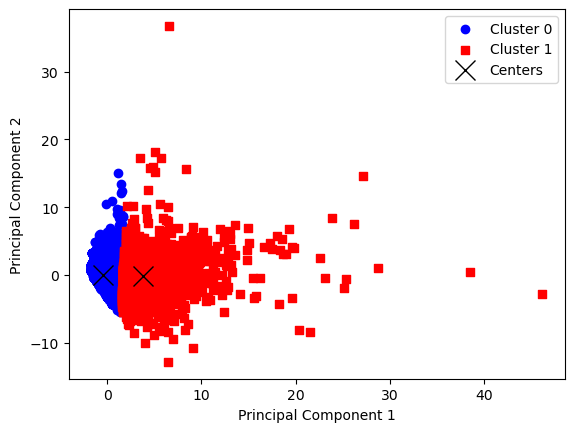

In [42]:
# Perform the k-means clustering
k_means = KMeans(n_clusters=2, random_state=42)
k_means.fit(pca_df)
labels = k_means.labels_
centers = k_means.cluster_centers_

# Plot the clusters and the centers
plt.scatter(pca_df[labels==0, 0], pca_df[labels==0, 1], c='blue', marker='o', label='Cluster 0')
plt.scatter(pca_df[labels==1, 0], pca_df[labels==1, 1], c='red', marker='s', label='Cluster 1')
plt.plot(centers[:, 0], centers[:, 1], 'kx', markersize=15, label='Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [45]:
from sklearn.decomposition import PCA
# Create and fit the PCA model
pca = PCA(n_components=2)
pca_components=pca.fit_transform(df_scaled)
pca_df=pd.DataFrame(data=pca_components,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.406795,0.948632
1,3.417324,-0.699946
2,-0.793526,1.549287
3,-0.966249,-0.260869
4,4.341295,1.342327
...,...,...
29995,-1.365063,0.719385
29996,-1.537077,0.628488
29997,-1.397474,0.792753
29998,-1.444584,0.734941


In [46]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters =2,random_state=42)
y=k_means.fit_predict(df_scaled)
pca_df_kmeans1=pd.concat([pca_df,pd.DataFrame({"Cluster":k_means.labels_})],axis=1)
pca_df_kmeans1

,PCA1,PCA2,Cluster
0,-1.406795,0.948632,1
1,3.417324,-0.699946,0
2,-0.793526,1.549287,1
3,-0.966249,-0.260869,1
4,4.341295,1.342327,0
...,...,...,...
29995,-1.365063,0.719385,1
29996,-1.537077,0.628488,1
29997,-1.397474,0.792753,1
29998,-1.444584,0.734941,1


<function matplotlib.pyplot.show(close=None, block=None)>

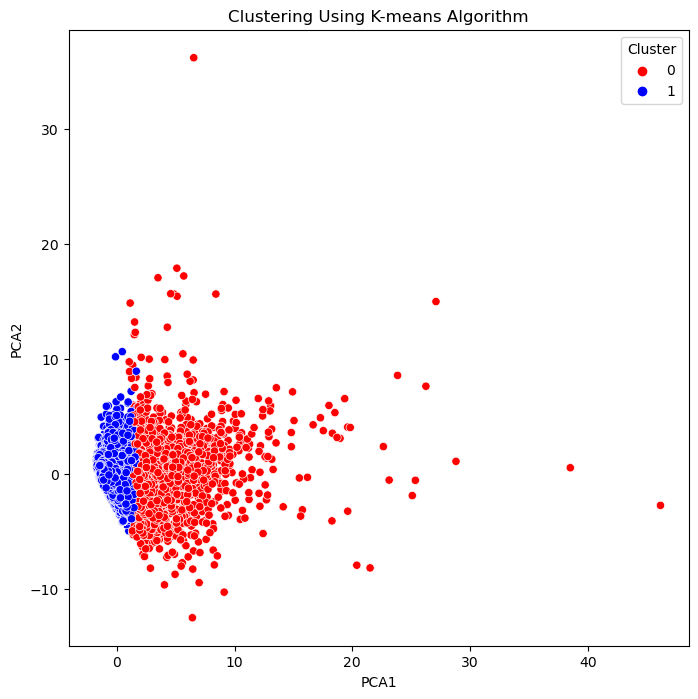

In [48]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="Cluster",data=pca_df_kmeans1,palette={"red","blue"})
plt.title("Clustering Using K-means Algorithm")
plt.show

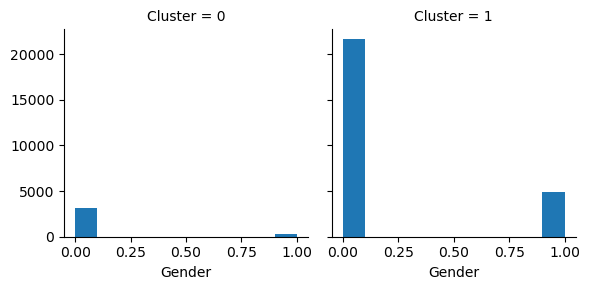

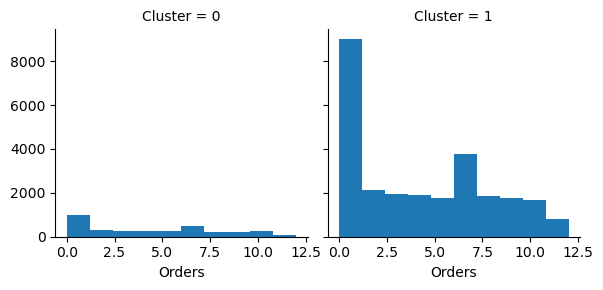

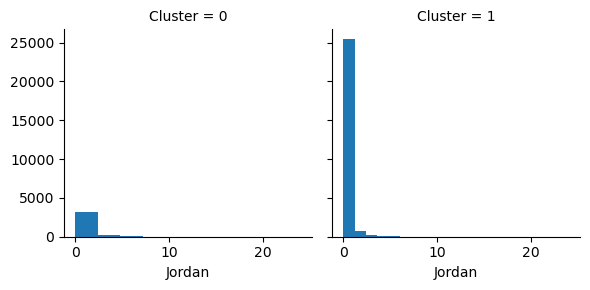

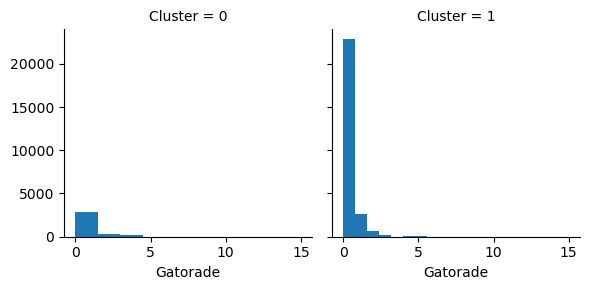

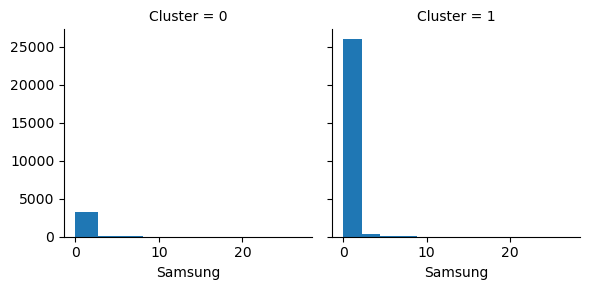

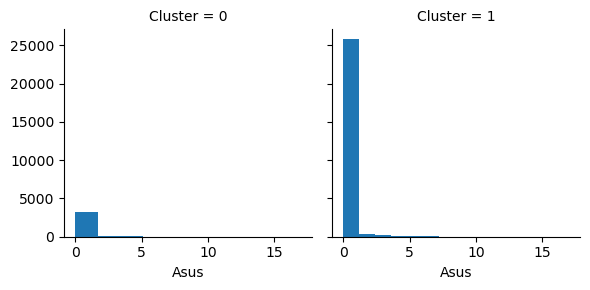

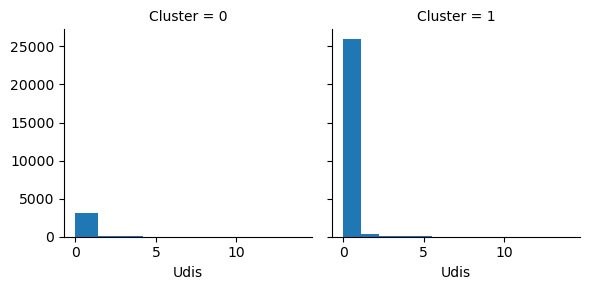

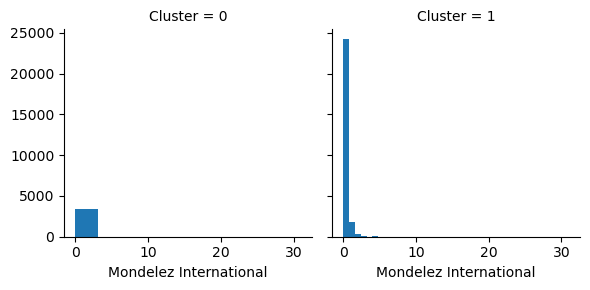

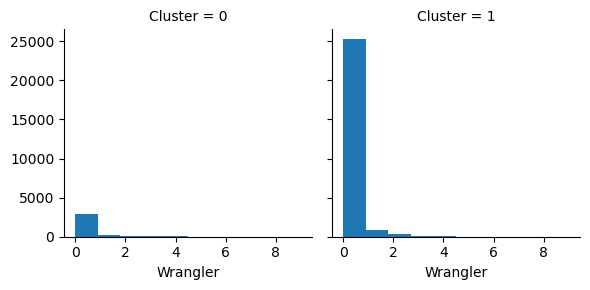

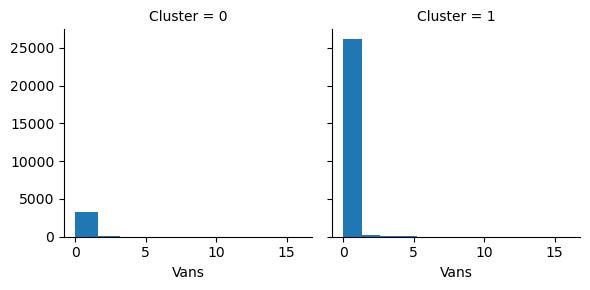

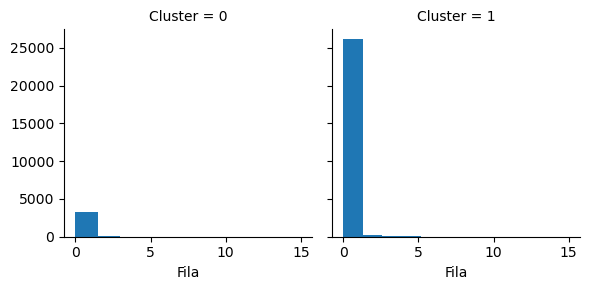

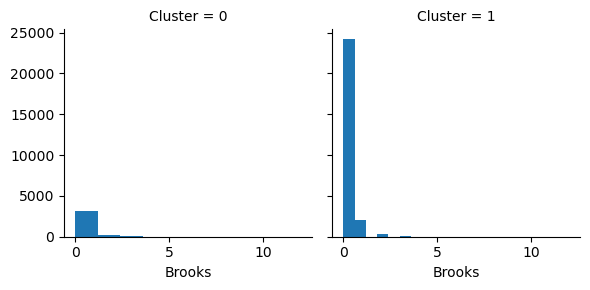

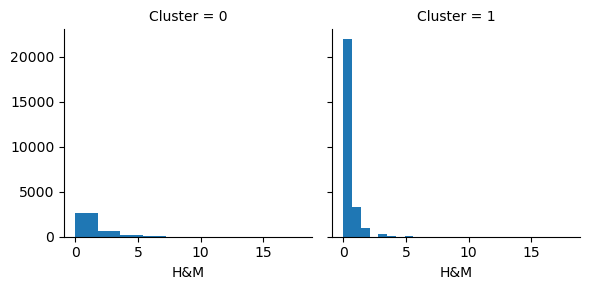

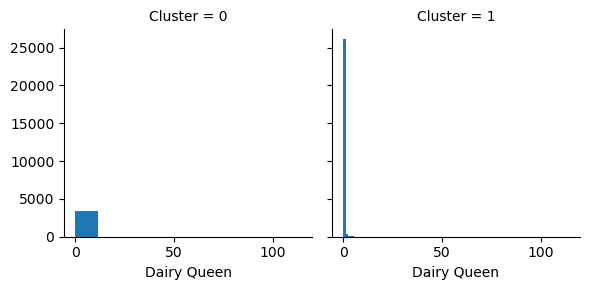

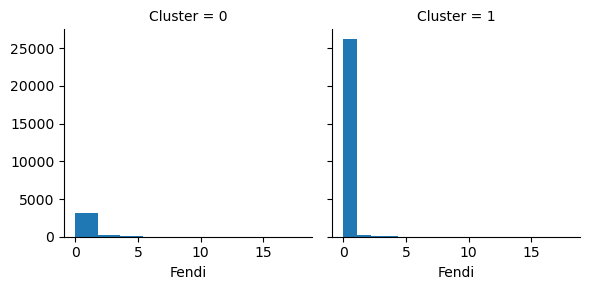

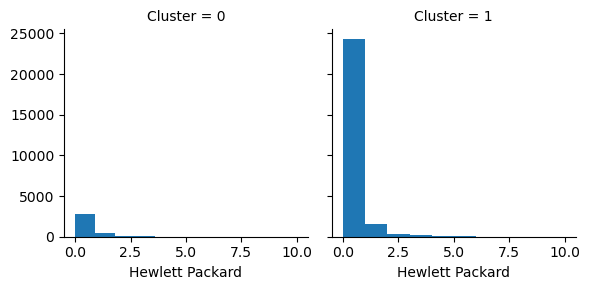

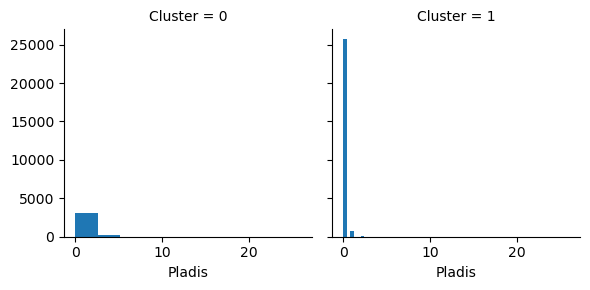

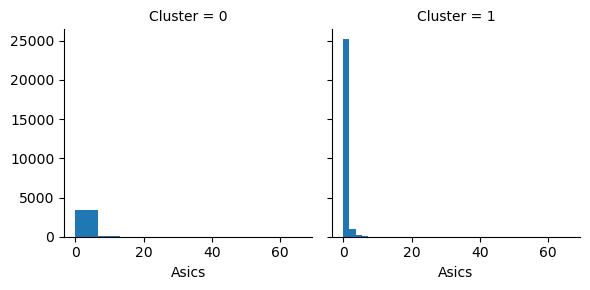

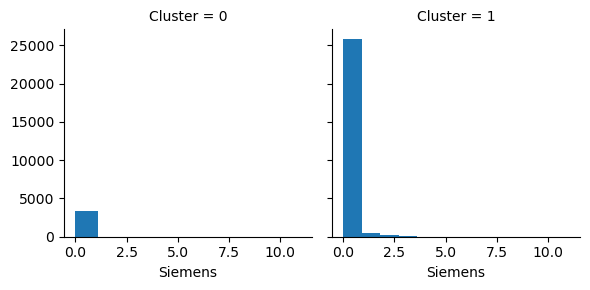

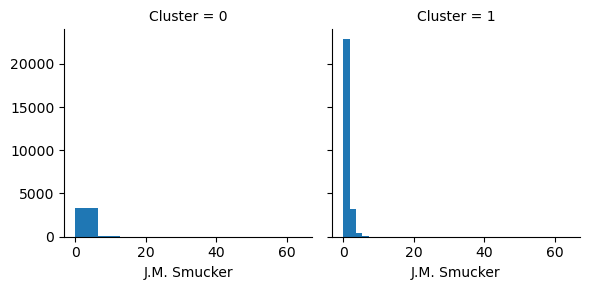

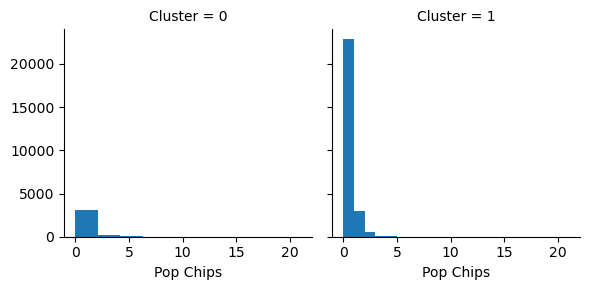

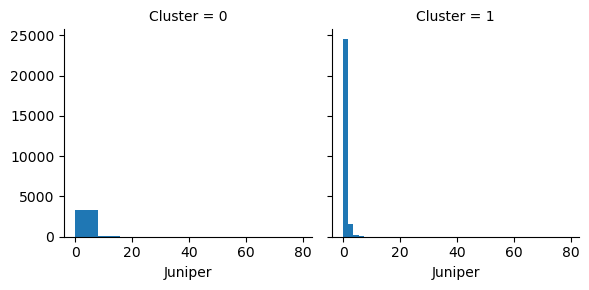

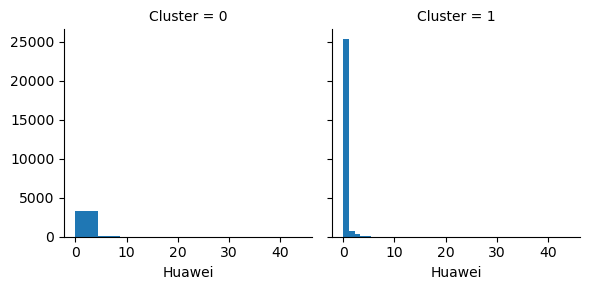

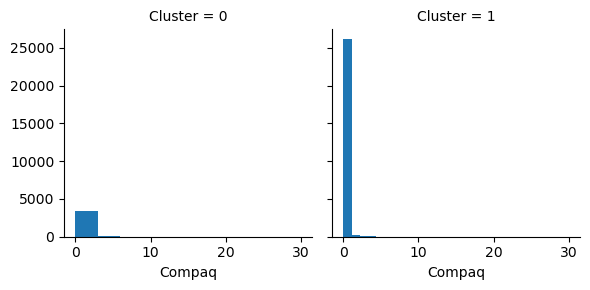

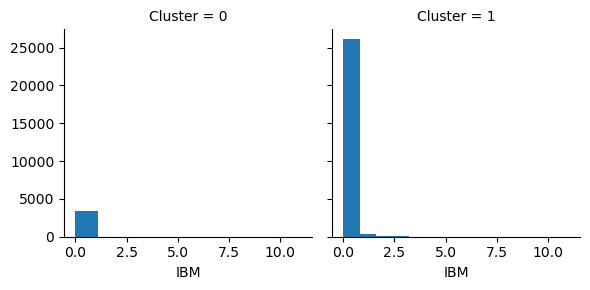

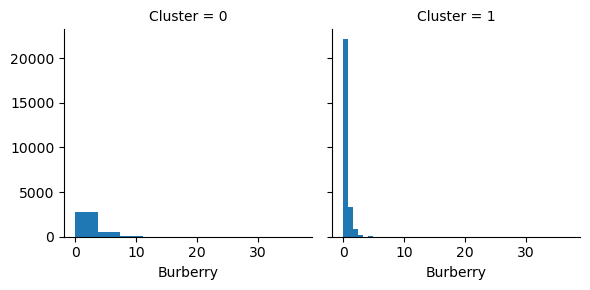

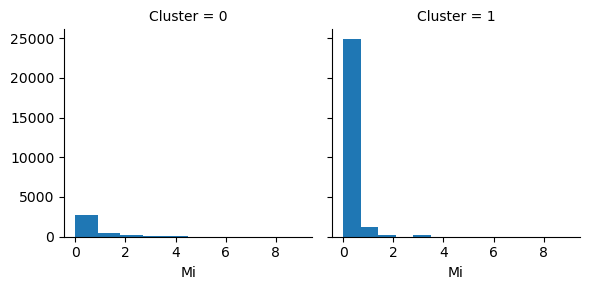

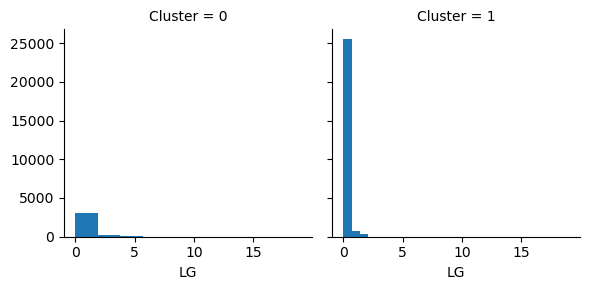

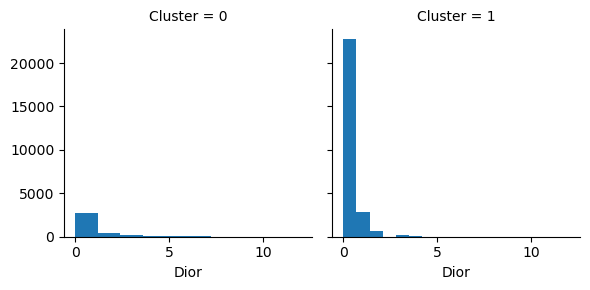

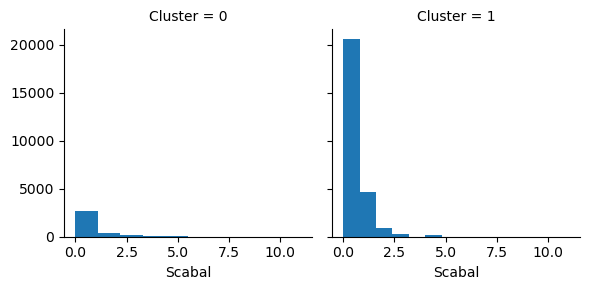

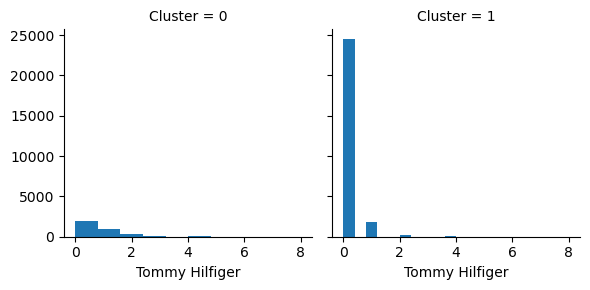

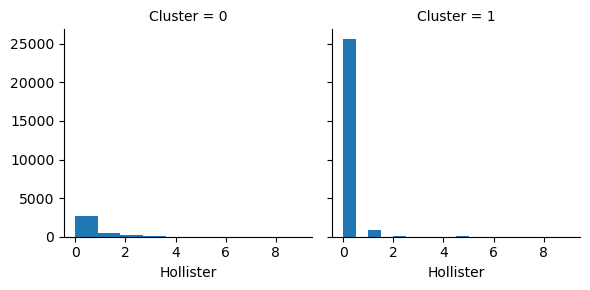

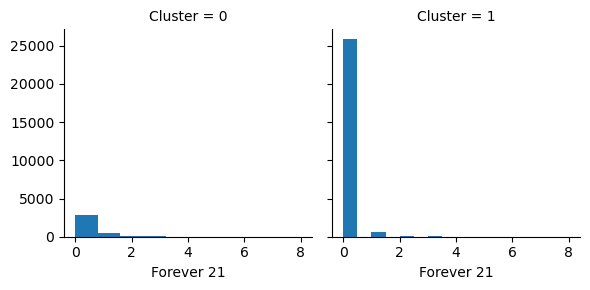

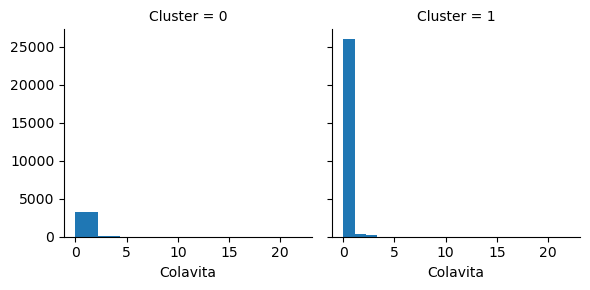

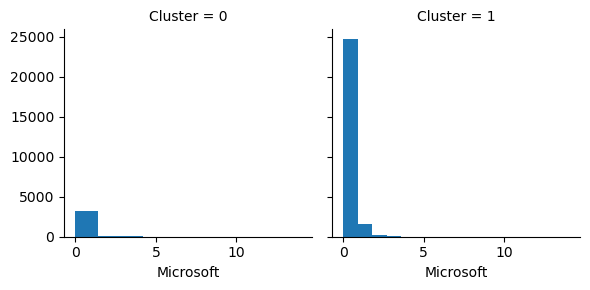

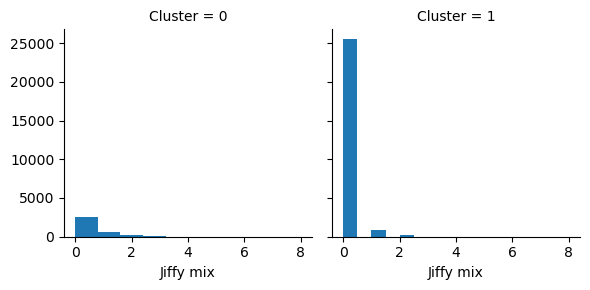

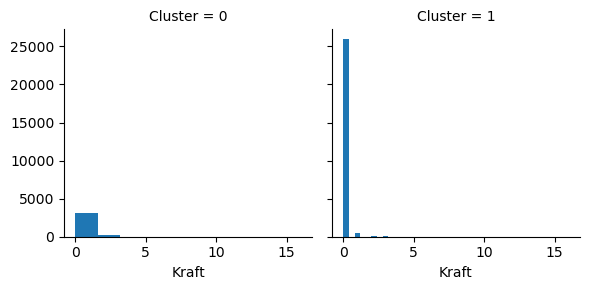

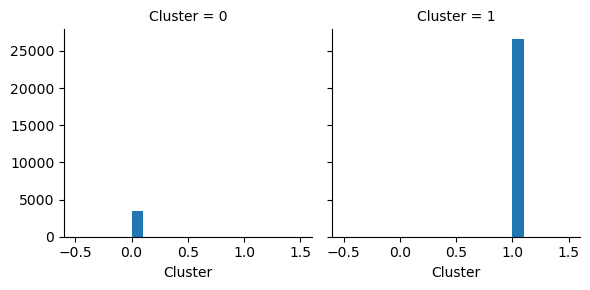

In [49]:
for i in df:
    grid=sns.FacetGrid(df,col="Cluster")
    grid=grid.map(plt.hist,i)
plt.show()    

In [51]:
df_c1=df.groupby("Cluster").mean().T
df_c1


Cluster,0,1
Gender,0.082384,0.185875
Orders,4.418054,4.137826
Jordan,0.727140,0.208225
Gatorade,0.611160,0.206118
Samsung,0.480280,0.189788
Asus,0.378615,0.133348
Udis,0.354952,0.116304
Mondelez International,0.316389,0.117018
Wrangler,0.312883,0.080408
Vans,0.263804,0.091809


# Inference of Cluster Profiling when we use n_cluster=2

1).Cluster 0 has a higher mean value for orders (4.418054) than cluster 1 (4.137826), which suggests that they are more frequent
buyers. They also have higher preferences for most of the brands, especially for luxury and fashion brands like Burberry, Dior,
Scabal, and Fendi, which indicates that they are interested in high-quality and stylish products.They have a lower 
gender ratio (0.082384) than cluster 1 (0.185875), which means that they are mostly male.

2.)Cluster 1 has a lower mean value for orders (4.137826) than cluster 0 (4.418054), which suggests that they are less frequent
buyers. They also have lower preferences for most of the brands, except for some technology and food brands like Juniper, 
J.M. Smucker, and Colavita, which indicates that they are interested in practical and functional products. They have a higher
gender ratio (0.185875) than cluster 0 (0.082384), which means that they have a more balanced mix of male and female customers.


In [52]:
df

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,H&M,Dairy Queen,Fendi,Hewlett Packard,Pladis,Asics,Siemens,J.M. Smucker,Pop Chips,Juniper,Huawei,Compaq,IBM,Burberry,Mi,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,0
2,1,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
29996,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
29997,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
29998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Saving the New dataset with Cluster Column as new .csv file.

In [88]:
cluster_df.to_csv(r"C:\Users\SKAN\Desktop\Raajee\final_project\clustered_customer_data.csv")

# Now the Dataset is changes into Unsupervised to Supervised Classification.

In [25]:
import pandas as pd
df1=pd.read_csv(r"C:\Users\SKAN\Desktop\Raajee\final_project\clustered_customer_data.csv")
df1

,Unnamed: 0,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,0,1,M,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,2,F,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,3,M,7,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,3,4,F,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,5,NaN,10,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,29996,M,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29996,29996,29997,M,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29997,29997,29998,M,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29998,29998,29999,M,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
df1.columns

Index(['Unnamed: 0', 'Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade',
       'Samsung', 'Asus', 'Udis', 'Mondelez International', 'Wrangler', 'Vans',
       'Fila', 'Brooks', 'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard',
       'Pladis', 'Asics', 'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper',
       'Huawei', 'Compaq', 'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal',
       'Tommy Hilfiger', 'Hollister', 'Forever 21', 'Colavita', 'Microsoft',
       'Jiffy mix', 'Kraft', 'Cluster'],
      dtype='object')

In [27]:
df1.isnull().sum()

Unnamed: 0                   0
Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hi

In [28]:
df1.dropna(inplace=True)

In [29]:
df1.isnull().sum()

Unnamed: 0                0
Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita            

In [30]:
df1["Gender"]=pd.get_dummies(df1["Gender"],drop_first=True)

In [31]:
df1

,Unnamed: 0,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,0,1,1,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,2,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2,3,1,7,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,3,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,5,6,0,4,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,29996,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29996,29996,29997,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29997,29997,29998,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29998,29998,29999,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
df1.drop(["Unnamed: 0","Cust_ID"],axis=1,inplace=True)

In [33]:
df1

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,4,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29996,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29997,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
29998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Build The Classification Model

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
x=df1.drop(["Cluster"],axis=1)
y=df1["Cluster"]

In [36]:
x.shape,y.shape

((27276, 37), (27276,))

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(19093, 37)
(8183, 37)
(19093,)
(8183,)


In [14]:

lr = LogisticRegression(max_iter=10000)
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn=KNeighborsClassifier()

models = [lr, svc, dt, rf]
scores = []

for m in models:
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)
    acc = accuracy_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred,average='micro') * 100
    rec = recall_score(y_test, y_pred,average='micro') * 100
    f1 = f1_score(y_test, y_pred,average='micro') * 100
    cm=confusion_matrix(y_test, y_pred)
    scores.append([acc, prec, rec, f1,cm])

In [15]:
scores_df = pd.DataFrame(columns=['Model'], data=['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest'])
scores_df = pd.concat([scores_df, pd.DataFrame(scores, columns=['Accuracy', 'Precision', 'Recall', 'F1','Confusion_matrix'])], axis=1)
df1_sc=scores_df.sort_values(["Accuracy"],ascending=False)
print(df1_sc.to_markdown())

|    | Model               |   Accuracy |   Precision |   Recall |      F1 | Confusion_matrix   |
|---:|:--------------------|-----------:|------------:|---------:|--------:|:-------------------|
|  0 | Logistic Regression |    99.7923 |     99.7923 |  99.7923 | 99.7923 | [[ 942   11]       |
|    |                     |            |             |          |         |  [   6 7224]]      |
|  1 | SVC                 |    98.7046 |     98.7046 |  98.7046 | 98.7046 | [[ 879   74]       |
|    |                     |            |             |          |         |  [  32 7198]]      |
|  3 | Random Forest       |    95.6617 |     95.6617 |  95.6617 | 95.6617 | [[ 617  336]       |
|    |                     |            |             |          |         |  [  19 7211]]      |
|  2 | Decision Tree       |    93.1565 |     93.1565 |  93.1565 | 93.1565 | [[ 612  341]       |
|    |                     |            |             |          |         |  [ 219 7011]]      |


In [18]:
parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]

grid_search = GridSearchCV(lr,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(x_train, y_train)

C:\Users\SKAN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\SKAN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\SKAN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\SKAN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\SKAN\anaconda3\Lib\site-packages\sklearn\linear_model\_logi

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid=[{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']},
                         {'penalty': ['none', 'elasticnet', 'l1', 'l2']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
             scoring='accuracy')

In [20]:
grid_search.best_params_

{'C': 100}

In [39]:
lr=LogisticRegression(C=100,max_iter=1000)
lr.fit(x_train,y_train)

LogisticRegression(C=100, max_iter=1000)

# Evaluation Metrics

In [40]:
x_predict=lr.predict(x_train)

In [41]:
confusion_matrix(y_train,x_predict)

array([[ 2266,     4],
       [    3, 16820]], dtype=int64)

<Axes: >

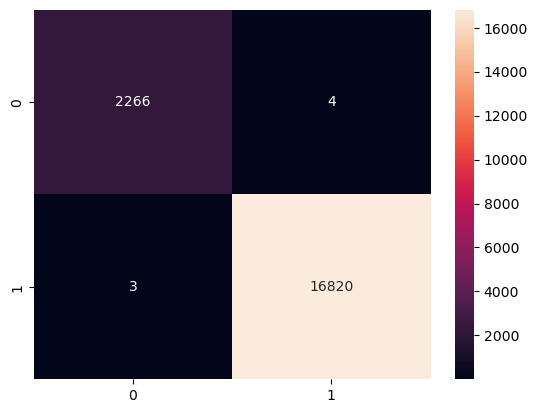

In [42]:
sns.heatmap(confusion_matrix(y_train,x_predict),annot=True,fmt='0.5g')

In [43]:
print(classification_report(y_train,x_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2270
           1       1.00      1.00      1.00     16823

    accuracy                           1.00     19093
   macro avg       1.00      1.00      1.00     19093
weighted avg       1.00      1.00      1.00     19093



AUC: 0.999


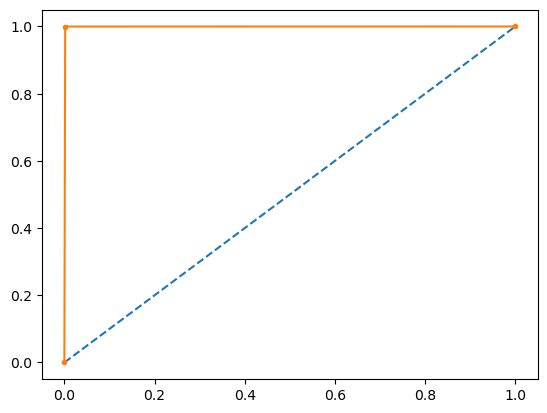

In [44]:
# AUC and ROC for the training data
# calculating on the basis of a person not defaulting
# calculate AUC
auc = roc_auc_score(y_train,x_predict)
print('AUC: %.3f' % auc)
# # calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,x_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
y_predict=lr.predict(x_test)

In [27]:
confusion_matrix(y_test,y_predict)

array([[ 951,    2],
       [   7, 7223]], dtype=int64)

<Axes: >

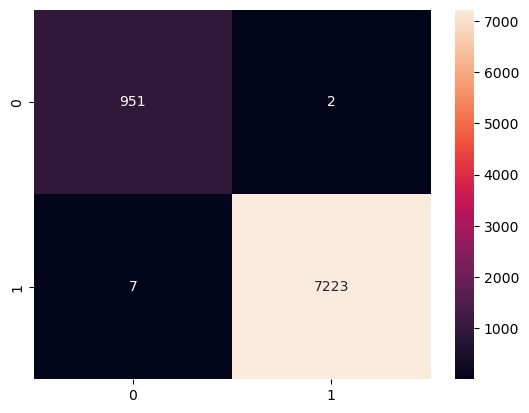

In [43]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,fmt='0.5g')

In [28]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       953
           1       1.00      1.00      1.00      7230

    accuracy                           1.00      8183
   macro avg       1.00      1.00      1.00      8183
weighted avg       1.00      1.00      1.00      8183



AUC: 0.998


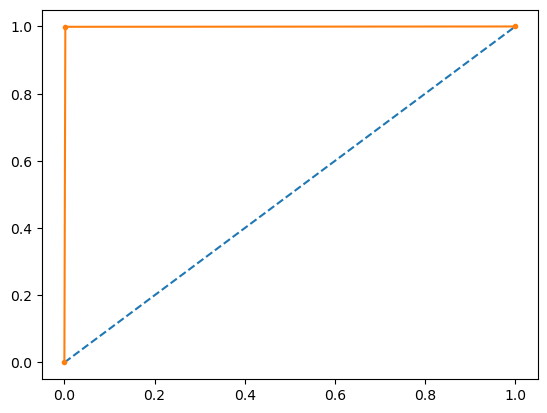

In [35]:
# AUC and ROC for the testing data

# calculating on the basis of a person not defaulting
# calculate AUC
auc = roc_auc_score(y_test,y_predict)
print('AUC: %.3f' % auc)
# # calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,y_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# saving the model as pickle file

In [50]:
import pickle
with open(r'C:\Users\SKAN\Desktop\Raajee\final_project\cmodel.pkl', 'wb') as file:
    pickle.dump(lr, file)

# Load the model and Predict the Result

In [2]:
import pickle
with open(r'C:\Users\SKAN\Desktop\Raajee\final_project\cmodel.pkl', 'rb') as file:
    plc=pickle.load( file)

In [14]:
array=[[1,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

In [15]:
result=plc.predict(array)

In [16]:
print(result)

[1]


# Actual value is 1 and Model Gives the Result is 1.

# Solution

1). Model Predict the result will 0 then This Customer Belongs To Cluster 0.They are more frequent buyers.They also have higher preferences for most of the brands, especially for luxury and fashion brands. They are interested in high-quality and stylish product.They are mostly Male.
    
2).  Model Predict the result will 1 then This Customer Belongs To Cluster 1.They are less frequent buyers.They also have lower preferences for most of the brands, except for some technology and food brands.They are interested in practical and functional products.They have a more balanced mix of male and female customers.   